# HCV data Machine Learning Analysing

In [4]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import plotly.express as px
import numpy as np
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from functions import *

## Cleaning Data

Import dataset:

In [5]:
data = pd.read_csv("healthcare-dataset-stroke-data.csv")

Check how many NA valuse do we have in the data:

In [6]:
data.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

because the number of NAs were not many, so we droped all the rows containing NA value:

In [15]:
data = data.dropna()
data.sample(20)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
4884,50663,Female,62.00,0,0,Yes,Govt_job,Urban,110.84,23.4,smokes,0
2335,57569,Male,48.00,0,0,Yes,Private,Rural,106.74,33.7,formerly smoked,0
3901,71417,Male,46.00,0,0,No,Private,Urban,159.67,37.3,never smoked,0
4998,39229,Female,24.00,0,0,Yes,Private,Rural,67.99,32.1,never smoked,0
4893,40826,Female,42.00,0,0,No,Private,Urban,63.27,27.0,never smoked,0
619,35565,Male,43.00,0,0,Yes,Private,Urban,111.43,21.9,smokes,0
4839,68157,Male,1.08,0,0,No,children,Rural,83.27,24.3,Unknown,0
2094,6199,Female,52.00,0,0,Yes,Govt_job,Rural,107.27,30.1,Unknown,0
3924,39958,Male,18.00,0,0,No,Private,Rural,118.93,22.4,never smoked,0
548,34641,Male,40.00,0,0,No,Private,Rural,100.35,28.1,never smoked,0


In [6]:
data.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Check if the data type of all columns are correct:

In [7]:
data.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

### EDA for data exploration

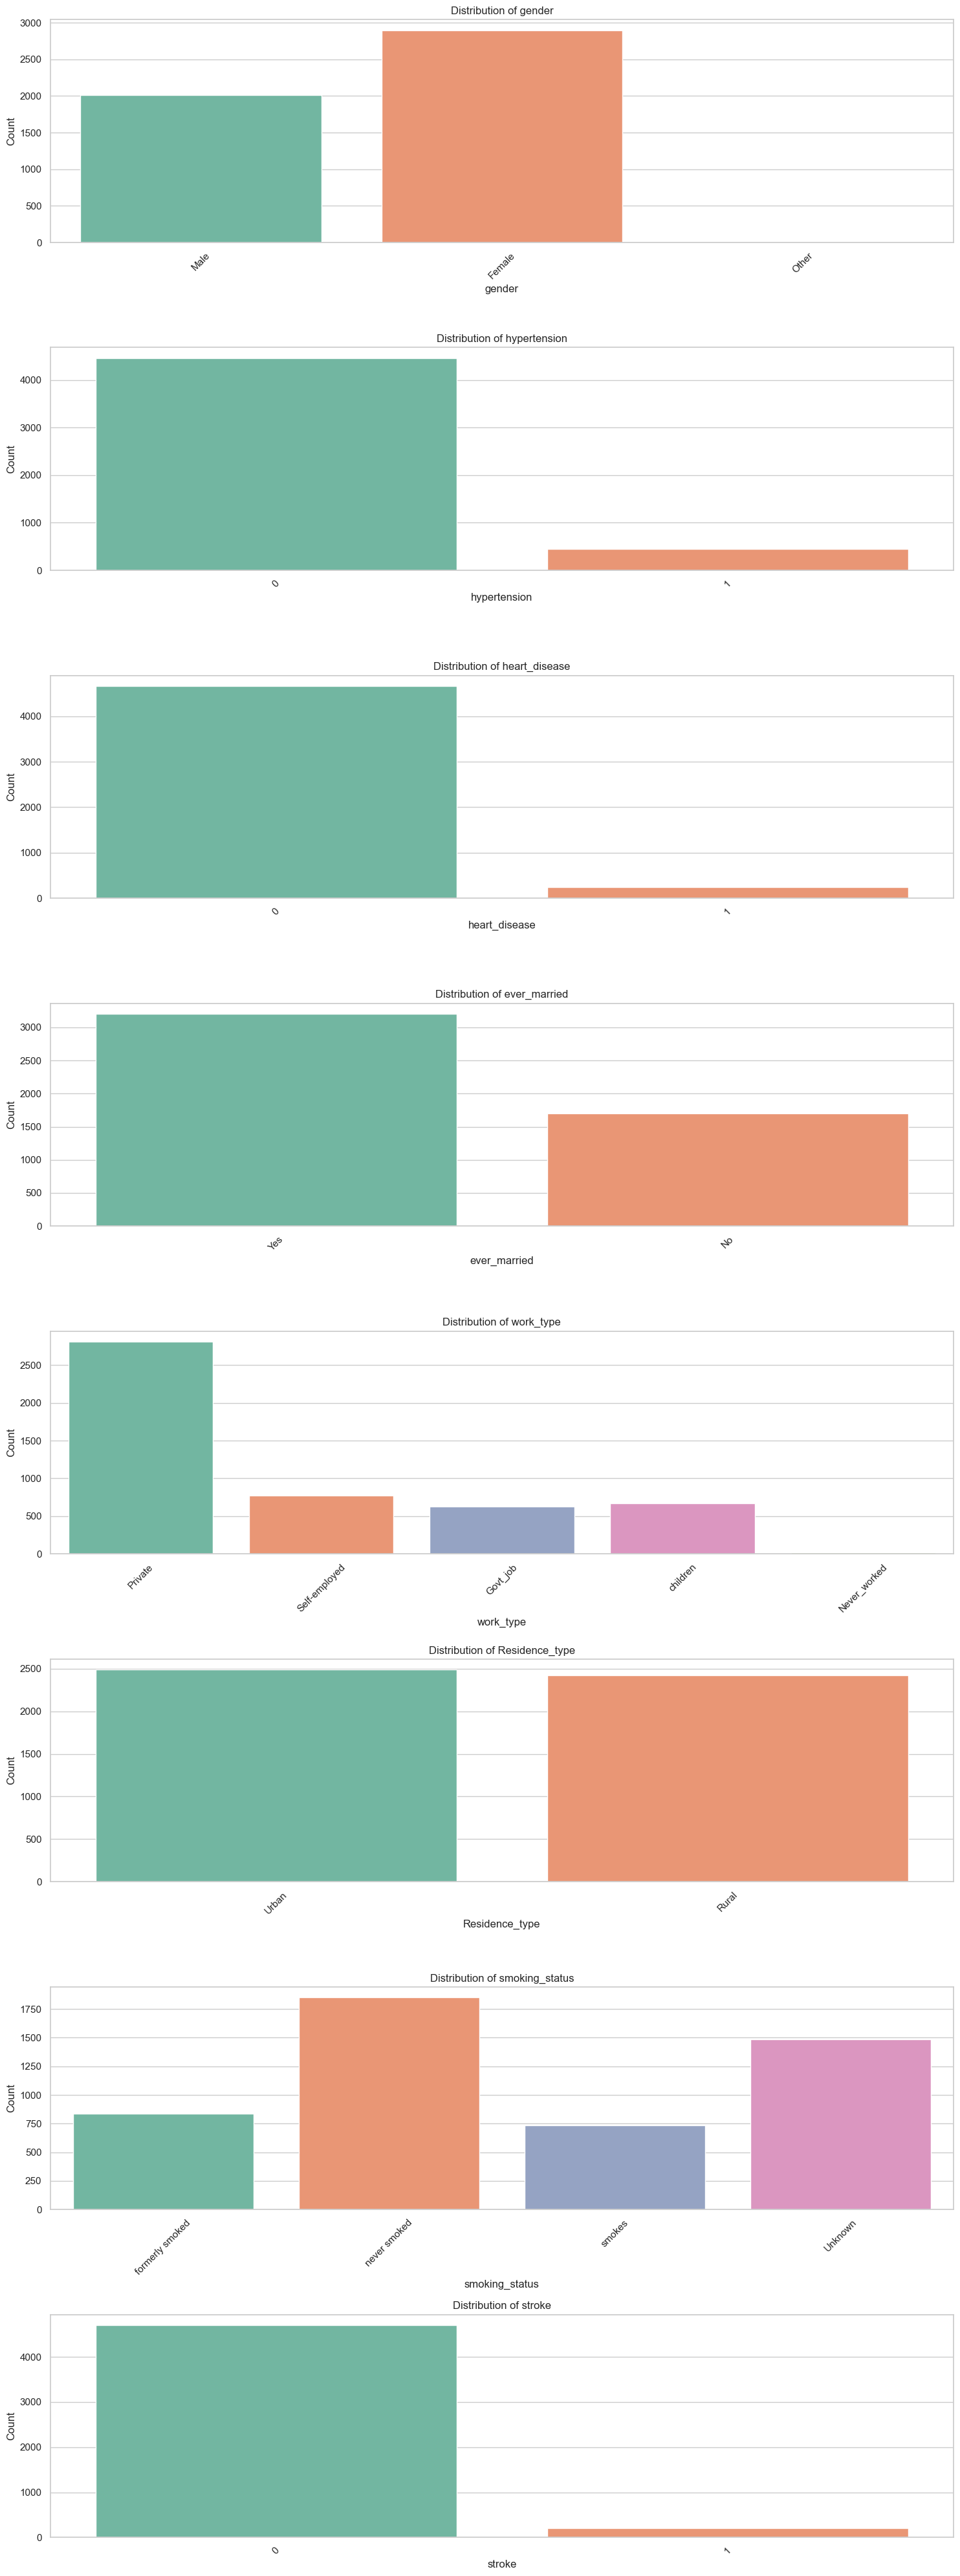

c:\Users\reetu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\reetu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\reetu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\reetu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

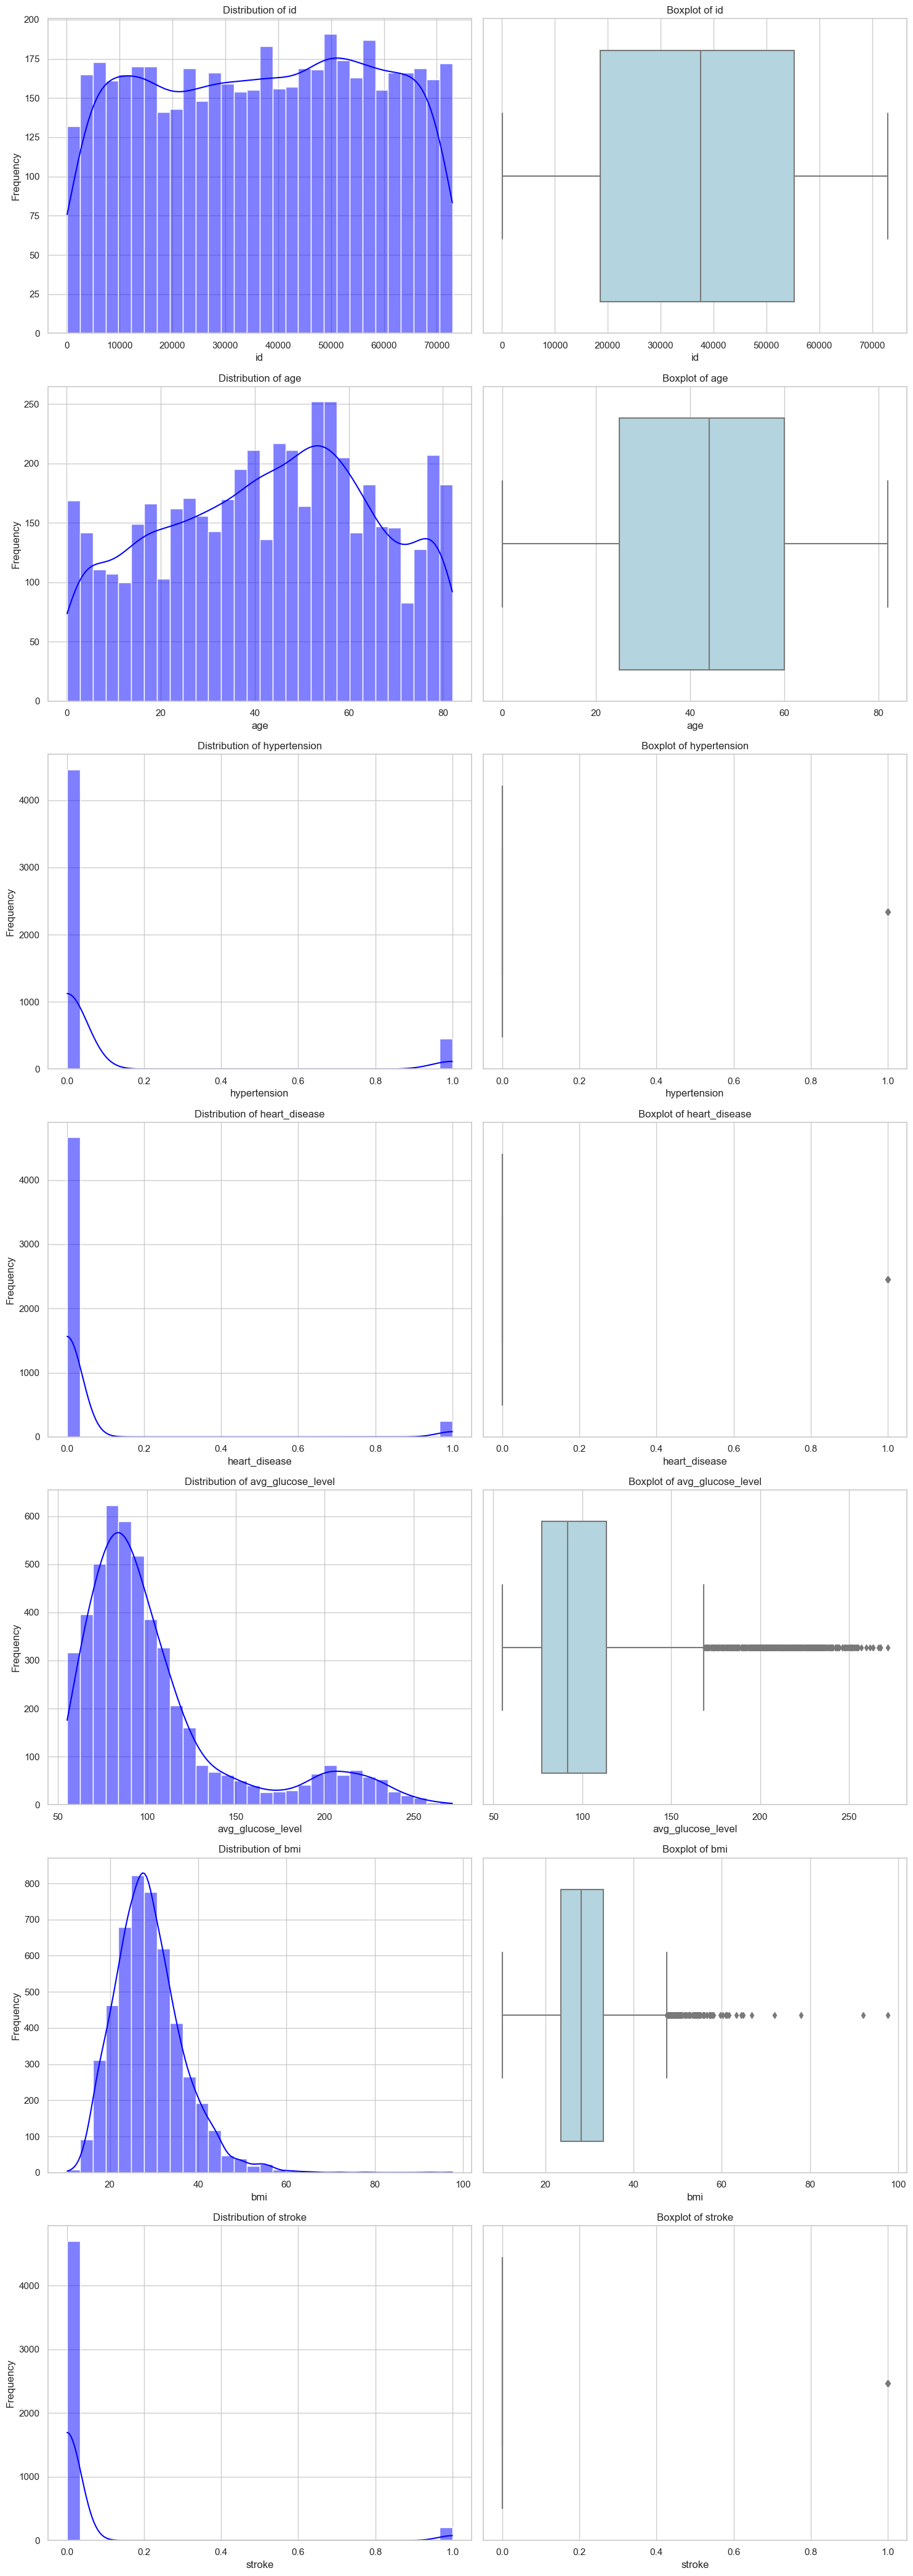

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def eda_plots(data):
    # Setting up the plot style
    sns.set(style="whitegrid")
    
    # Separate categorical and numerical columns
    categorical_cols = [col for col in data.columns if data[col].dtype == 'object' or data[col].nunique() < 20]
    numerical_cols = [col for col in data.columns if np.issubdtype(data[col].dtype, np.number)]

    # Plot Categorical Data
    if categorical_cols:
        n_categorical = len(categorical_cols)
        # Create a grid of subplots for categorical plots
        plt.figure(figsize=(15, 5 * n_categorical))
        for i, column in enumerate(categorical_cols, 1):
            plt.subplot(n_categorical, 1, i)
            sns.countplot(x=data[column], palette="Set2")
            plt.title(f'Distribution of {column}')
            plt.xlabel(column)
            plt.ylabel('Count')
            plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    # Plot Numerical Data
    if numerical_cols:
        n_numerical = len(numerical_cols)
        # Create subplots with two columns: one for histogram and one for boxplot
        fig, axes = plt.subplots(nrows=n_numerical, ncols=2, figsize=(15, 6 * n_numerical))
        fig.tight_layout(pad=5.0)
        
        for i, column in enumerate(numerical_cols):
            # Histogram with KDE
            sns.histplot(data[column].dropna(), kde=True, color="blue", bins=30, ax=axes[i, 0])
            axes[i, 0].set_title(f'Distribution of {column}')
            axes[i, 0].set_xlabel(column)
            axes[i, 0].set_ylabel('Frequency')
            
            # Boxplot for detecting outliers
            sns.boxplot(x=data[column], color="lightblue", ax=axes[i, 1])
            axes[i, 1].set_title(f'Boxplot of {column}')
            axes[i, 1].set_xlabel(column)
        
        plt.tight_layout()
        plt.show()

eda_plots(data)


c:\Users\reetu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


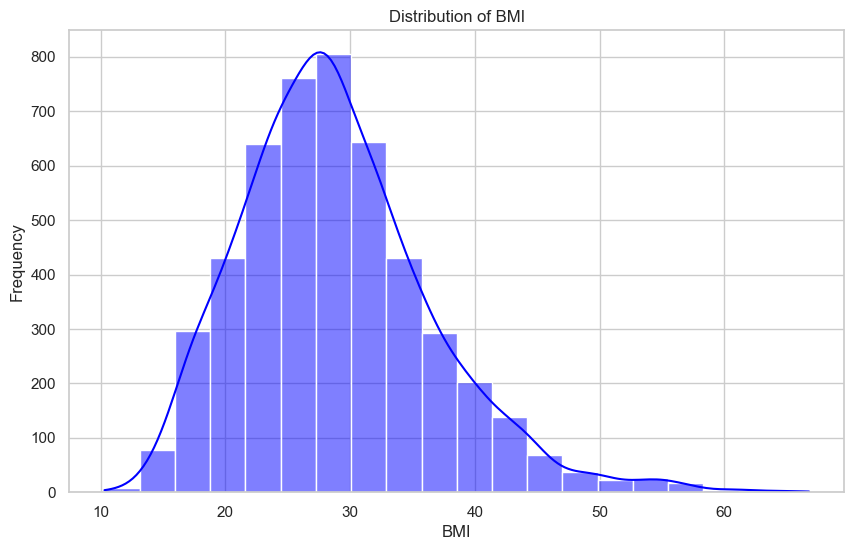

In [9]:
mean_bmi = data['bmi'].mean()

# Step 2: Replace values higher than 75 with the mean value
data.loc[data['bmi'] > 70, 'bmi'] = mean_bmi
plt.figure(figsize=(10, 6))
sns.histplot(data['bmi'], kde=True, color="blue", bins=20)
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Transform the "AgeGroup" column into differernt bins and make it numerical:

In [6]:
data = clean_age_column(data)

data.head()

,id,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,AgeGroup
0,9046,Male,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,4
1,51676,Female,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,3
2,31112,Male,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,4
3,60182,Female,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,2
4,1665,Female,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,4


In [7]:
data['gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

Transform the "gender" column from categorical to numerical:

In [8]:
# Drop rows where 'gender' is 'Other'
data = data[data['gender'] != 'Other']

In [9]:
data= pd.get_dummies(data, columns=['gender', 'ever_married', 'work_type', 'Residence_type'])
data.head()

,id,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke,AgeGroup,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban
0,9046,0,1,228.69,36.6,formerly smoked,1,4,False,True,False,True,False,False,True,False,False,False,True
1,51676,0,0,202.21,NaN,never smoked,1,3,True,False,False,True,False,False,False,True,False,True,False
2,31112,0,1,105.92,32.5,never smoked,1,4,False,True,False,True,False,False,True,False,False,True,False
3,60182,0,0,171.23,34.4,smokes,1,2,True,False,False,True,False,False,True,False,False,False,True
4,1665,1,0,174.12,24.0,never smoked,1,4,True,False,False,True,False,False,False,True,False,True,False


The "Category" column is our Target column. so we want to make sure how to categorize it in the best form.

In [10]:
data["stroke"].unique()

array([1, 0], dtype=int64)

In [11]:
data.drop(columns="id", inplace=True)
data.head()

,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke,AgeGroup,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban
0,0,1,228.69,36.6,formerly smoked,1,4,False,True,False,True,False,False,True,False,False,False,True
1,0,0,202.21,NaN,never smoked,1,3,True,False,False,True,False,False,False,True,False,True,False
2,0,1,105.92,32.5,never smoked,1,4,False,True,False,True,False,False,True,False,False,True,False
3,0,0,171.23,34.4,smokes,1,2,True,False,False,True,False,False,True,False,False,False,True
4,1,0,174.12,24.0,never smoked,1,4,True,False,False,True,False,False,False,True,False,True,False


In [12]:
data["smoking_status"].value_counts()

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     884
smokes              789
Name: count, dtype: int64

In [17]:
data['smoking_status'] = data['smoking_status'].map({'never smoked': 0,'Unknown': 1,'formerly smoked': 2,'smokes': 3})
data['smoking_status'].astype(int)
data.head()

,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke,AgeGroup,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban
0,0,1,228.69,36.6,2,1,4,False,True,False,True,False,False,True,False,False,False,True
2,0,1,105.92,32.5,0,1,4,False,True,False,True,False,False,True,False,False,True,False
3,0,0,171.23,34.4,3,1,2,True,False,False,True,False,False,True,False,False,False,True
4,1,0,174.12,24.0,0,1,4,True,False,False,True,False,False,False,True,False,True,False
5,0,0,186.21,29.0,2,1,4,False,True,False,True,False,False,True,False,False,False,True


In [13]:
# change the data type of the 'bmi' column to float
data = data.apply(pd.to_numeric, errors='coerce')

## Feature Selection

In [19]:
# Calculate the correlation matrix
correlation_matrix = np.abs(data.corr())

# Create the heatmap using Plotly Express
fig = px.imshow(correlation_matrix,
                x=correlation_matrix.columns,
                y=correlation_matrix.columns,
                color_continuous_scale='RdBu_r',  # Red-Blue diverging color scale
                zmin=-1,
                zmax=1,
                aspect="auto",
                title='Correlation Heatmap of Numerical Variables')

# Update the layout for better readability
fig.update_layout(
    xaxis_title="",
    yaxis_title="",
    xaxis={'side': 'top'},  # Move x-axis labels to the top
    width=800,
    height=700
)

# Add correlation values as text annotations
for i, row in enumerate(correlation_matrix.values):
    for j, value in enumerate(row):
        fig.add_annotation(
            x=correlation_matrix.columns[j],
            y=correlation_matrix.columns[i],
            text=f"{value:.2f}",
            showarrow=False,
            font=dict(size=8)
        )

# Show the plot
fig.show()

In [14]:
data.columns

Index(['hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke', 'AgeGroup', 'gender_Female', 'gender_Male',
       'ever_married_No', 'ever_married_Yes', 'work_type_Govt_job',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children', 'Residence_type_Rural',
       'Residence_type_Urban'],
      dtype='object')

In [15]:
data = data.drop(['gender_Female', 'gender_Male',
       'ever_married_No', 'ever_married_Yes'], axis=1)

## Split Data into Train and Test

In [16]:
features = data.drop(columns = ["stroke"])
target = data["stroke"]

In [21]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Check class distribution in the original training set
print("Original training set class distribution:", Counter(y_train))

# Step 2: Apply Random Over-Sampling to the training set
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)
print("Resampled training set class distribution:", Counter(y_train_resampled))

Original training set class distribution: Counter({0: 3900, 1: 187})
Resampled training set class distribution: Counter({0: 3900, 1: 3900})


In [22]:
X_train = X_train_resampled
y_train = y_train_resampled

In [32]:
X_test.sample(20)

,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,AgeGroup,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban
350,1,1,200.28,30.0,NaN,4,False,False,False,True,False,False,True
3210,0,0,95.29,31.6,NaN,3,False,False,True,False,False,False,True
2592,0,1,77.30,33.4,NaN,3,True,False,False,False,False,False,True
1612,0,0,68.40,23.0,NaN,0,False,False,False,True,False,False,True
4847,0,0,84.92,47.8,NaN,1,False,False,True,False,False,False,True
3857,0,0,85.92,35.6,NaN,1,False,False,True,False,False,False,True
291,0,0,79.17,20.0,NaN,0,False,False,False,False,True,True,False
561,0,1,144.10,27.6,NaN,4,False,False,True,False,False,False,True
248,0,0,78.81,19.6,NaN,4,False,False,True,False,False,True,False
3026,1,0,90.91,39.1,NaN,2,False,False,True,False,False,False,True


In [49]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Check class distribution in the original training set
print("Original training set class distribution:", Counter(y_train))

# Step 2: Apply Random Over-Sampling to the training set
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)
print("Resampled training set class distribution:", Counter(y_train_resampled))

Original training set class distribution: Counter({0: 3770, 1: 156})
Resampled training set class distribution: Counter({0: 3770, 1: 3770})


In [20]:
X_train.shape

NameError: name 'X_train' is not defined

In [53]:
y_train.shape

(7540,)

### Standardize The Data

In [54]:
# Standardize the features
X_train_scaled, X_test_scaled = Standardizer(X_train, X_test)

In [56]:
x_train.shape , y_train.shape

((7540, 13), (7540,))

### Normalize The Data

In [79]:
# Normalize the features
X_train_norm, X_test_norm = Normalizer(X_train, X_test)

In [80]:
X_train.shape , y_train.shape

((7540, 13), (7540,))

Based on the result of Heatmap we can drop these two not important columns : 

In [81]:
X_train_norm = pd.DataFrame(X_train_norm, columns = X_train.columns)
# X_train_reduced = X_train_norm.drop(columns = ["gender","Residence_type"])

X_test_norm = pd.DataFrame(X_test_norm, columns = X_test.columns)
# X_test_reduced = X_test_norm.drop(columns = ["gender","Residence_type"])

In [78]:
x_train.shape , y_train.shape

((7540, 13), (7540,))

In [61]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)

X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)

In [62]:
x_train.shape , y_train.shape

((7540, 13), (7540,))

## Modeling

#### Define and Evaluate Models

In [82]:
models = {
    'Random Forest': (RandomForestClassifier(random_state=42), {
        'n_estimators': [50, 100],
        'max_depth': [None, 10, 20]
    }),
    'KNN': (KNeighborsClassifier(), {
        'n_neighbors': [3, 5, 7]
    }),
    'Logistic Regression': (LogisticRegression(max_iter=1000, random_state=42), {
        'C': [0.1, 1, 10]
    }),
    'SVM': (SVC(probability=True, random_state=42), {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf']
    }),
    'Decision Tree': (DecisionTreeClassifier(random_state=42), {
        'max_depth': [None, 10, 20]
    })
}


In [ ]:
ensemble_models = {
    'Bagging with Random Forest': (BaggingClassifier(base_estimator=RandomForestClassifier(random_state=42), random_state=42), {
        'n_estimators': [10, 20],
        'base_estimator__n_estimators': [50, 100],
        'base_estimator__max_depth': [None, 10, 20],
        
    }),
    'Bagging with KNN': (BaggingClassifier(base_estimator=KNeighborsClassifier(), random_state=42), {
        'n_estimators': [10, 20],
        'base_estimator__n_neighbors': [3, 5, 7],
        
    }),
    'Bagging with Logistic Regression': (BaggingClassifier(base_estimator=LogisticRegression(max_iter=1000, random_state=42), random_state=42), {
        'n_estimators': [10, 20],
        'base_estimator__C': [0.1, 1, 10],
        
    }),
    'Bagging with SVM': (BaggingClassifier(base_estimator=SVC(probability=True, random_state=42), random_state=42), {
        'n_estimators': [10, 20],
        'base_estimator__C': [0.1, 1, 10],
        'base_estimator__kernel': ['linear', 'rbf'],
       
    }),
    'Bagging with Decision Tree': (BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42), random_state=42), {
        'n_estimators': [10, 20],
        'base_estimator__max_depth': [None, 10, 20]
    }),
    'AdaBoost with Decision Tree': (AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1, random_state=42), random_state=42), {
        'n_estimators': [50, 100],
        'learning_rate': [0.01, 0.1, 1]
    }),
    'AdaBoost with Logistic Regression': (AdaBoostClassifier(base_estimator=LogisticRegression(max_iter=1000, random_state=42), random_state=42), {
        'n_estimators': [50, 100],
        'learning_rate': [0.01, 0.1, 1]
    }),
    'AdaBoost with KNN': (AdaBoostClassifier(base_estimator=KNeighborsClassifier(), random_state=42), {
        'n_estimators': [50, 100],
        'learning_rate': [0.01, 0.1, 1]
    }),
    'Gradient Boosting with Decision Tree': (GradientBoostingClassifier(init=DecisionTreeClassifier(random_state=42), random_state=42), {
        'n_estimators': [50, 100],
        'learning_rate': [0.01, 0.1, 1],
        'max_depth': [3, 5, 7]
    })
}


#### Function for preprocessing and evalution

In [86]:
X_train.shape , y_train.shape

((7540, 13), (7540,))

In [88]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def preprocess_and_evaluate(model, model_name, param_distributions, X_train, y_train, X_test, y_test, scaler, n_iter=100):
    # Apply scaling if needed
    if scaler:
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
    else:
        X_train_scaled, X_test_scaled = X_train, X_test

    # Set up RandomizedSearchCV
    random_search = RandomizedSearchCV(model, param_distributions, n_iter=n_iter, cv=5, n_jobs=-1, scoring='accuracy', random_state=42)
    random_search.fit(X_train_scaled, y_train)

    # Get the best model
    best_model = random_search.best_estimator_

    # Predict and evaluate
    y_pred = best_model.predict(X_test_scaled)
    result = {
        'Model': model_name,
        'Scaler': scaler.__class__.__name__ if scaler else 'None',
        'Best Params': random_search.best_params_,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1 Score': f1_score(y_test, y_pred, average='weighted')
    }
    
    return result


#### Define Model Evaluation Function for models without ensembles

In [76]:
x_train.shape , y_train.shape

((7540, 13), (7540,))

In [68]:
X_test.shape , y_test.shape

((982, 13), (982,))

In [89]:
def evaluate_all_models(models, X_train, y_train, X_test, y_test):
    results = []
    scalers = [None, StandardScaler(), MinMaxScaler()]
    
    for model_name, (model, param_grid) in models.items():
        for scaler in scalers:
            result = preprocess_and_evaluate(model, model_name, param_grid, X_train, y_train, X_test, y_test, scaler)
            results.append(result)
    
    results_df = pd.DataFrame(results)
    results_df.to_csv('individual_model_results.csv', index=False)
    print(results_df)
    return results_df

# Evaluate individual models
individual_results_df = evaluate_all_models(models, X_train, y_train, X_test, y_test)


c:\Users\reetu\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning:

The total space of parameters 6 is smaller than n_iter=100. Running 6 iterations. For exhaustive searches, use GridSearchCV.

c:\Users\reetu\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning:

The total space of parameters 6 is smaller than n_iter=100. Running 6 iterations. For exhaustive searches, use GridSearchCV.

c:\Users\reetu\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning:

The total space of parameters 6 is smaller than n_iter=100. Running 6 iterations. For exhaustive searches, use GridSearchCV.

c:\Users\reetu\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning:

The total space of parameters 3 is smaller than n_iter=100. Running 3 iterations. For exhaustive searches, use GridSearchCV.

c:\Users\reetu\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning:

The total s

#### Define Model Evaluation Function for models with ensembles

In [ ]:
def evaluate_all_ensemble_models(ensemble_models, X_train, y_train, X_test, y_test):
    results = []
    scalers = [None, StandardScaler(), MinMaxScaler()]
    
    for model_name, (model, param_grid) in ensemble_models.items():
        for scaler in scalers:
            result = preprocess_and_evaluate(model, model_name, param_grid, X_train, y_train, X_test, y_test, scaler)
            results.append(result)
    
    results_df = pd.DataFrame(results)
    results_df.to_csv('ensemble_model_results.csv', index=False)
    print(results_df)
    return results_df

# Evaluate ensemble models
ensemble_results_df = evaluate_all_ensemble_models(ensemble_models, X_train, y_train, X_test, y_test)


c:\Users\reetu\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning:

The total space of parameters 48 is smaller than n_iter=100. Running 48 iterations. For exhaustive searches, use GridSearchCV.

c:\Users\reetu\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

c:\Users\reetu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\reetu\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning:

The total space of parameters 48 is smaller than n_iter=100. Running 48 iterations. For exhaustive searches, use GridSearchCV.

c:\Users\reetu\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning:

`base_estimator` was renamed to `

#### Save results of models as csv and dataframe and Choose the Best Model

In [ ]:
# Load individual and ensemble results
individual_results_df = pd.read_csv('individual_model_results.csv')
ensemble_results_df = pd.read_csv('ensemble_model_results.csv')

# Combine results
combined_results_df = pd.concat([individual_results_df, ensemble_results_df], ignore_index=True)

# Save combined results
combined_results_df.to_csv('combined_model_results.csv', index=False)
print(combined_results_df)

# Choose the best model based on a chosen metric, e.g., highest F1 Score
best_model_result = combined_results_df.loc[combined_results_df['F1 Score'].idxmax()]
print("Best Model:")
print(best_model_result)


#### Make a sample dataframe to test your model

In [ ]:
sample_data = {
    'id': [10001, 10002, 10003, 10004, 10005, 10006, 10007, 10008, 10009, 10010],
    'gender': ['Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female'],
    'age': [45, 34, 56, 62, 50, 41, 37, 55, 70, 65],
    'hypertension': [0, 0, 1, 0, 1, 0, 0, 1, 0, 1],
    'heart_disease': [0, 0, 1, 0, 0, 1, 0, 1, 0, 0],
    'ever_married': ['Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes'],
    'work_type': ['Private', 'Self-employed', 'Govt_job', 'Private', 'Private', 'Self-employed', 'Private', 'Govt_job', 'Private', 'Private'],
    'Residence_type': ['Urban', 'Rural', 'Urban', 'Urban', 'Rural', 'Urban', 'Urban', 'Rural', 'Urban', 'Rural'],
    'avg_glucose_level': [140.55, 95.30, 180.50, 210.30, 125.45, 150.70, 110.20, 95.00, 200.80, 180.00],
    'bmi': [30, 22, 28, 27, 32, 29, 31, 23, 30, 26],
    'smoking_status': ['never smoked', 'smokes', 'formerly smoked', 'never smoked', 'smokes', 'never smoked', 'formerly smoked', 'never smoked', 'smokes', 'formerly smoked'],
    'stroke': [0, 0, 1, 0, 1, 1, 0, 1, 0, 1]
}

# Create DataFrame
df_sample = pd.DataFrame(sample_data)

# Save to CSV
df_sample.to_csv('sample_data.csv', index=False)

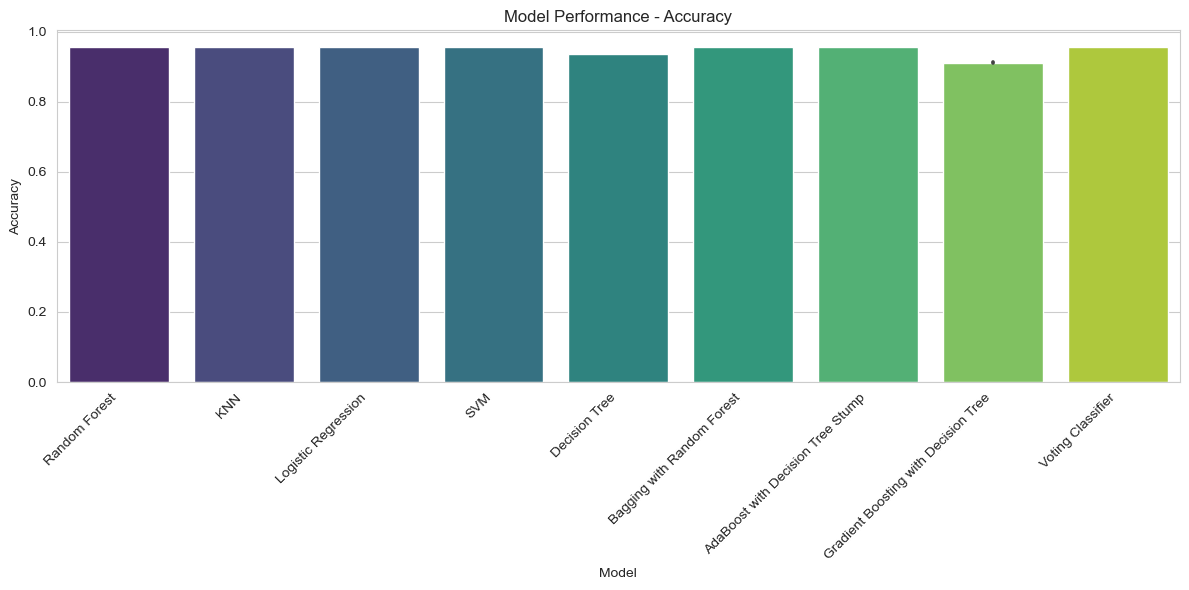

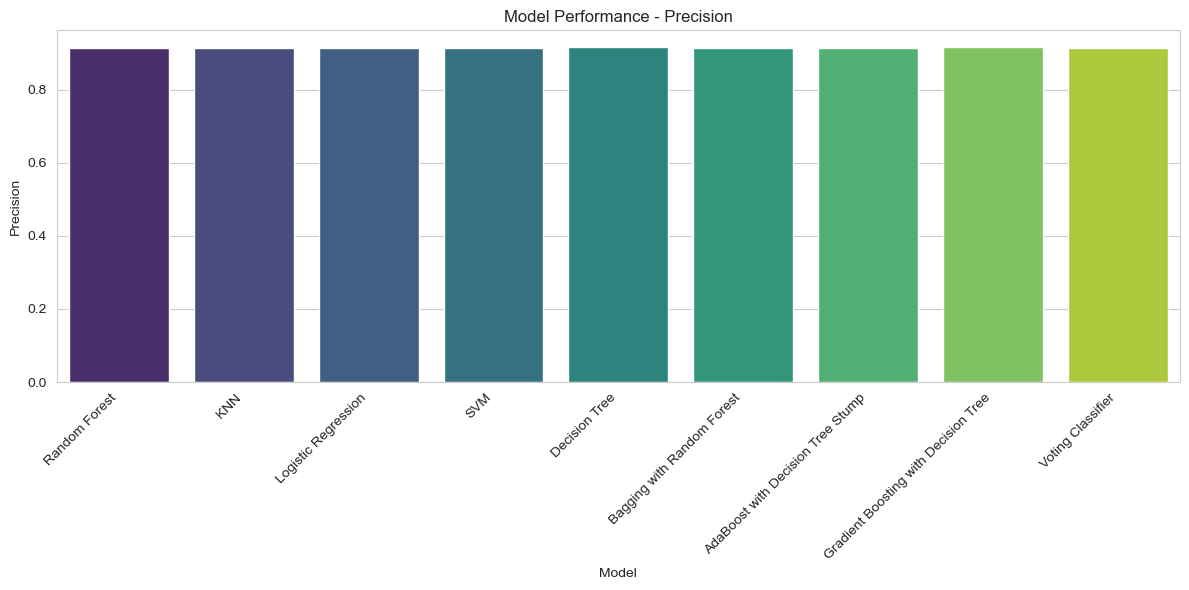

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'combined_results_df' contains the results with columns like 'Model', 'Accuracy', 'Precision', etc.

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Plot the performance metrics
def plot_model_performance(results_df, metric):
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Model', y=metric, data=results_df, palette='viridis')
    plt.xticks(rotation=45, ha='right')
    plt.title(f'Model Performance - {metric}')
    plt.xlabel('Model')
    plt.ylabel(metric)
    plt.tight_layout()
    plt.show()

# Plot accuracy
plot_model_performance(combined_results_df, 'Accuracy')
# Plot precision
plot_model_performance(combined_results_df, 'Precision')


In [ ]:
import numpy as np

def plot_feature_importance(model, feature_names):
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
        indices = np.argsort(importances)[::-1]
        plt.figure(figsize=(10, 6))
        plt.title("Feature Importances")
        plt.bar(range(len(feature_names)), importances[indices], align="center")
        plt.xticks(range(len(feature_names)), np.array(feature_names)[indices], rotation=90)
        plt.xlim([-1, len(feature_names)])
        plt.xlabel('Feature')
        plt.ylabel('Importance')
        plt.tight_layout()
        plt.show()

# Assuming `best_model` is the model with feature importance
plot_feature_importance(best_model, X_train.columns)


NameError: name 'best_model' is not defined

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

# Assuming `y_test` and `y_pred` are your true and predicted labels, and `class_names` is a list of class names
plot_confusion_matrix(y_test, y_pred, class_names)


In [ ]:
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(y_true, y_score):
    fpr, tpr, _ = roc_curve(y_true, y_score)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc='lower right')
    plt.show()

# Assuming `y_test` and `y_score` (model's prediction probabilities) are available
plot_roc_curve(y_test, y_score)


NameError: name 'y_score' is not defined

In [ ]:
from sklearn.metrics import precision_recall_curve

def plot_precision_recall_curve(y_true, y_scores):
    precision, recall, _ = precision_recall_curve(y_true, y_scores)
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, color='blue', lw=2)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.show()

# Assuming `y_test` and `y_scores` (model's prediction probabilities) are available
plot_precision_recall_curve(y_test, y_scores)


NameError: name 'y_scores' is not defined

In [ ]:
# Summarize the best model results
summary_df = combined_results_df.loc[combined_results_df['Accuracy'].idxmax()]
print("Summary of Best Model:")
print(summary_df)
